# Odd Ball

# Modelling Time!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [51]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [52]:
modelling_df = pd.read_csv('csv/no_club.csv', index_col=0)

In [53]:
modelling_df.head()

,FTR,season_period,xg1_5g_avg,xg2_5g_avg,gd_5g_avg,elo_diff,game1_D,game1_H,game2_D,game2_H,game3_D,game3_H,game4_D,game4_H,game5_D,game5_H
0,0,0,0.650,1.306,0.4,-90.930786,0,0,0,1,1,0,0,1,0,0
340,1,0,1.078,1.228,1.0,30.798828,0,0,0,1,0,1,0,1,1,0
1,0,0,0.596,1.138,0.8,12.096313,0,1,1,0,0,1,0,0,0,1
392,0,0,2.090,0.756,2.0,110.588257,0,1,0,1,0,0,0,1,0,1
170,2,0,2.468,0.630,1.4,280.346558,0,1,0,1,0,1,1,0,1,0


In [54]:
y = modelling_df.pop('FTR')

In [55]:
y.value_counts(normalize=True)

0    0.483168
1    0.300000
2    0.216832
Name: FTR, dtype: float64

In [56]:
# Getting that sweet baseline

In [57]:
X = modelling_df.copy()

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [59]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=(X_train.columns))

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [60]:
X_train.columns

Index(['season_period', 'xg1_5g_avg', 'xg2_5g_avg', 'gd_5g_avg', 'elo_diff',
       'game1_D', 'game1_H', 'game2_D', 'game2_H', 'game3_D', 'game3_H',
       'game4_D', 'game4_H', 'game5_D', 'game5_H'],
      dtype='object')

In [61]:
model = LogisticRegressionCV(solver='liblinear', multi_class='ovr', cv=5)

model.fit(X_train, y_train)
yhat_test = model.predict(X_test)
log_reg_test = model.score(X_test, y_test)
log_reg_cv = model.score(X_train, y_train)
print(log_reg_test)
print(log_reg_cv)

0.5297029702970297
0.5445544554455446


In [62]:
pd.DataFrame(confusion_matrix(y_test, yhat_test))

,0,1,2
0,64,6,28
1,8,27,25
2,23,5,16


In [63]:
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.67      0.65      0.66        98
           1       0.71      0.45      0.55        60
           2       0.23      0.36      0.28        44

   micro avg       0.53      0.53      0.53       202
   macro avg       0.54      0.49      0.50       202
weighted avg       0.59      0.53      0.55       202



In [64]:
# Not great at predicting draws... hmm...

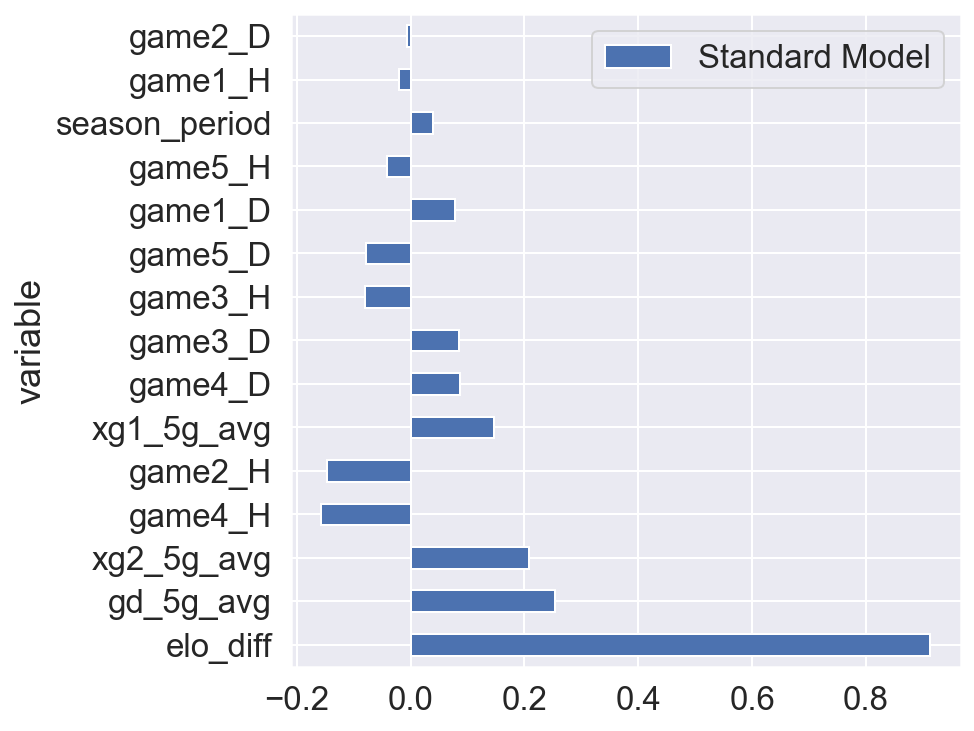

In [65]:
coefs_vars_model = pd.DataFrame({
    'coef': model.coef_[0],
    'variable': X.columns,
    'abscoef': np.abs(model.coef_[0])
})
coefs_vars_model.sort_values('abscoef', ascending=False, inplace=True)
coefs_vars_model.plot(kind='barh', x='variable', y='coef',
                      color='b', figsize=(6, 6), label='Standard Model')
plt.show()

In [66]:
lr_ridge = LogisticRegressionCV(
    penalty='l2', Cs=100, cv=5, solver='liblinear')
lr_ridge.fit(X_train, y_train)


ridge_test = lr_ridge.score(X_test, y_test)
ridge_cv = lr_ridge.score(X_train, y_train)

print(lr_ridge.C_)
print(ridge_test)
print(ridge_cv)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[0.0559081  0.04641589 0.0001    ]
0.5346534653465347
0.5396039603960396


In [67]:
yhat_ridge = lr_ridge.predict(X_test)
yhat_pp_ridge = lr_ridge.predict_proba(X_test)

In [68]:
pd.DataFrame(confusion_matrix(y_test, yhat_ridge))

,0,1,2
0,63,6,29
1,8,27,25
2,21,5,18


In [69]:
print(classification_report(y_test, yhat_ridge))

              precision    recall  f1-score   support

           0       0.68      0.64      0.66        98
           1       0.71      0.45      0.55        60
           2       0.25      0.41      0.31        44

   micro avg       0.53      0.53      0.53       202
   macro avg       0.55      0.50      0.51       202
weighted avg       0.60      0.53      0.55       202



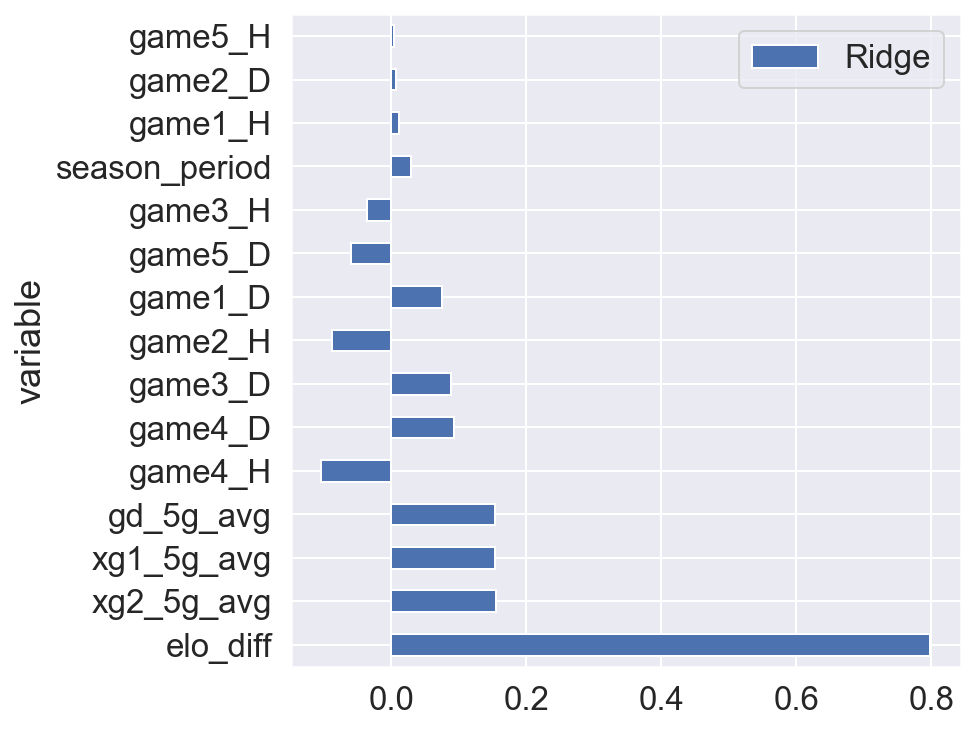

In [70]:
coefs_vars_ridge = pd.DataFrame({
    'coef': lr_ridge.coef_[0],
    'variable': X.columns,
    'abscoef': np.abs(lr_ridge.coef_[0])
})
coefs_vars_ridge.sort_values('abscoef', ascending=False, inplace=True)
coefs_vars_ridge.plot(kind='barh', x='variable', y='coef',
                      color='b', figsize=(6, 6), label='Ridge')
plt.show()

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
griddy = LogisticRegression()

In [73]:
griddy.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)>

In [74]:
params = {'penalty': ['l1', 'l2'],
                   'solver': ['liblinear'],
                   'C': [1,10,50,100]}

In [75]:
model_gs = GridSearchCV(griddy, params, cv=5, n_jobs=2, verbose=1)

In [76]:
model_gs.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    2.5s finished
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'penalty': ['l1', 'l2'], 'solver': ['liblinear'], 'C': [1, 10, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [77]:
model_gs.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

In [78]:
model_gs.best_score_

0.5767326732673267

In [79]:
lasso_test = model_gs.score(X_test, y_test)

In [80]:
lasso_cv = model_gs.score(X_train, y_train)

In [81]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

folds = 5
max_neighbors = 100



# plot test accuracy by number of neighbors:
test_acc = []
for i in range(1, int(max_neighbors)):
    knn = KNeighborsClassifier(n_neighbors=i)
    test_acc.append(np.mean(cross_val_score(knn, X_train, y_train, cv=folds)))

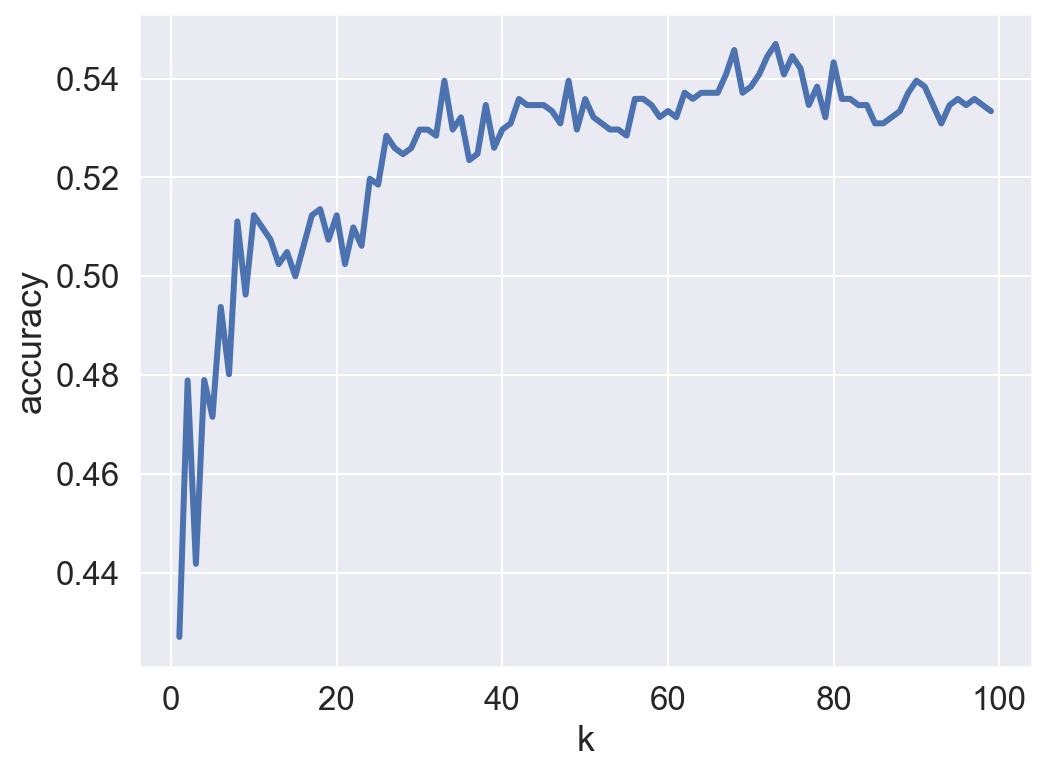

In [82]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1, int(max_neighbors)), test_acc, lw=3.)
ax.set_xlabel('k')
ax.set_ylabel('accuracy')
plt.show()

In [83]:
knn = KNeighborsClassifier(n_neighbors=88)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))
print(max(test_acc))


0.5445544554455446
0.5470286021010659


In [84]:
knn_test = knn.score(X_test, y_test)
knn_cv = cross_val_score(knn, X_train, y_train, cv=5).mean()

In [85]:
from sklearn import svm, linear_model, datasets

In [86]:
clf = svm.SVC(gamma='scale', probability=True)
clf_cv = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy').mean()
clf_test = clf.fit(X_train, y_train).score(X_test, y_test)

In [87]:
clf_test

0.5594059405940595

In [88]:
clf.get_params

<bound method BaseEstimator.get_params of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)>

In [89]:
from sklearn.model_selection import GridSearchCV


gamma_range = np.logspace(-5, 2, 20)
c = np.linspace(1,100,10)
param_grid = dict(gamma=gamma_range, C=c, kernel=['rbf'])

clf_grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy',
                    verbose=True, return_train_score=True, iid=False, n_jobs=2)
clf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  88 tasks      | elapsed:    5.6s
[Parallel(n_jobs=2)]: Done 388 tasks      | elapsed:   24.1s
[Parallel(n_jobs=2)]: Done 888 tasks      | elapsed:   56.8s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=False, n_jobs=2,
       param_grid={'gamma': array([1.00000e-05, 2.33572e-05, 5.45559e-05, 1.27427e-04, 2.97635e-04,
       6.95193e-04, 1.62378e-03, 3.79269e-03, 8.85867e-03, 2.06914e-02,
       4.83293e-02, 1.12884e-01, 2.63665e-01, 6.15848e-01, 1.43845e+00,
       3.35982e+00, 7.84760e+00, 1.83298e+01, 4.28133e+01, 1.00000e+02]), 'C': array([  1.,  12.,  23.,  34.,  45.,  56.,  67.,  78.,  89., 100.]), 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=True)

In [90]:
clf_grid_results = pd.DataFrame(clf_grid.cv_results_)
clf_grid_results['gamma'] = [x['gamma'] for x in clf_grid_results.params.values]
clf_grid_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score,gamma
0,0.086154,0.014983,0.003566,0.000940,1,1e-05,rbf,"{'C': 1.0, 'gamma': 1e-05, 'kernel': 'rbf'}",0.481481,0.481481,...,0.001465,85,0.482972,0.482972,0.482972,0.482226,0.482226,0.482674,0.000366,0.000010
1,0.070612,0.006145,0.002959,0.000267,1,2.33572e-05,rbf,"{'C': 1.0, 'gamma': 2.3357214690901213e-05, 'k...",0.481481,0.481481,...,0.001465,85,0.482972,0.482972,0.482972,0.482226,0.482226,0.482674,0.000366,0.000023
2,0.068554,0.001036,0.002909,0.000077,1,5.45559e-05,rbf,"{'C': 1.0, 'gamma': 5.4555947811685143e-05, 'k...",0.481481,0.481481,...,0.001465,85,0.482972,0.482972,0.482972,0.482226,0.482226,0.482674,0.000366,0.000055
3,0.070939,0.001701,0.002962,0.000172,1,0.000127427,rbf,"{'C': 1.0, 'gamma': 0.00012742749857031334, 'k...",0.481481,0.481481,...,0.001465,85,0.482972,0.482972,0.482972,0.482226,0.482226,0.482674,0.000366,0.000127
4,0.071567,0.001863,0.003204,0.000716,1,0.000297635,rbf,"{'C': 1.0, 'gamma': 0.00029763514416313193, 'k...",0.481481,0.481481,...,0.001465,85,0.482972,0.482972,0.482972,0.482226,0.482226,0.482674,0.000366,0.000298


In [91]:
clf_grid.best_params_

{'C': 78.0, 'gamma': 0.00029763514416313193, 'kernel': 'rbf'}

In [92]:

clf_grid_cv = clf_grid.score(X_train, y_train)
clf_grid_test = clf_grid.score(X_test, y_test)

In [93]:
clf_grid_test

0.5594059405940595

In [94]:
clf_grid.predict_proba(X)

array([[6.09474340e-04, 9.86747958e-01, 1.26425676e-02],
       [9.94134542e-01, 1.66662436e-05, 5.84879166e-03],
       [9.64796702e-01, 5.13255795e-04, 3.46900422e-02],
       ...,
       [7.76361670e-01, 1.74412402e-01, 4.92259282e-02],
       [8.46665440e-01, 1.21308127e-01, 3.20264336e-02],
       [6.93669490e-06, 9.97736169e-01, 2.25689435e-03]])

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [105]:

DT = DecisionTreeClassifier()
bc = BaggingClassifier(base_estimator=DT,
                       n_estimators=50,
                       max_features=0.5,
                       max_samples=0.5,
                       oob_score=True)


bc.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, n_estimators=50, n_jobs=None, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [106]:
bc_cv = cross_val_score(bc, X_train, y_train, cv=5).mean()

In [107]:
bc_test = bc.score(X_test, y_test)

In [108]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

In [109]:
gradboo_model = GradientBoostingClassifier(n_estimators=1000,
                                   criterion='mse',
                                   loss='deviance',
                                   max_depth=3,
                                   #learning_rate=1.0,
                                   random_state=1,
                                   min_samples_split=4)
gradboo_model.fit(X_train, y_train)


gradboo_cv = cross_val_score(gradboo_model, X_train, y_train, cv=5).mean()
gradboo_test = gradboo_model.score(X_test, y_test)

0    0.504950
1    0.584158
2    0.584158
3    0.594059
4    0.584158
dtype: float64


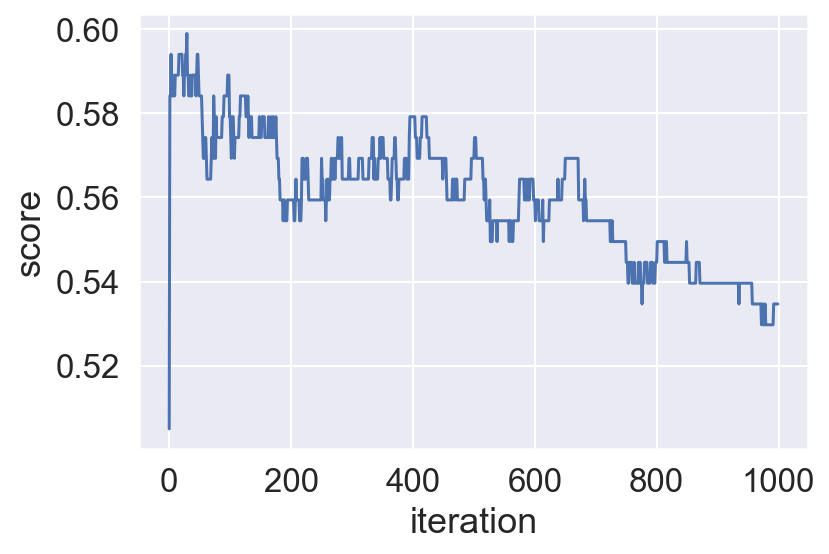

In [110]:
scores = pd.DataFrame(gradboo_model.staged_predict(X_test)).T.apply(
    lambda x: accuracy_score(y_test, x), axis=0)
print(scores.head())
scores.plot()
plt.xlabel('iteration')
plt.ylabel('score')
plt.show()

In [111]:
gradboo_model.get_params

<bound method BaseEstimator.get_params of GradientBoostingClassifier(criterion='mse', init=None, learning_rate=0.1,
              loss='deviance', max_depth=3, max_features=None,
              max_leaf_nodes=None, min_impurity_decrease=0.0,
              min_impurity_split=None, min_samples_leaf=1,
              min_samples_split=4, min_weight_fraction_leaf=0.0,
              n_estimators=1000, n_iter_no_change=None, presort='auto',
              random_state=1, subsample=1.0, tol=0.0001,
              validation_fraction=0.1, verbose=0, warm_start=False)>

In [112]:
params = {'n_estimators':[100,10000,100],
          'max_depth':[3,4,5],
          'min_samples_split':[2,4,6]
          }

grad_grid = GridSearchCV(gradboo_model, params, cv=5, n_jobs=2, verbose=1)

In [113]:
grad_grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  1.6min
[Parallel(n_jobs=2)]: Done 135 out of 135 | elapsed:  5.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='mse', init=None, learning_rate=0.1,
              loss='deviance', max_depth=3, max_features=None,
              max_leaf_nodes=None, min_impurity_decrease=0.0,
              min_impurity_split=None, min_samples_leaf=1,
              min_samples_split=...te=1, subsample=1.0, tol=0.0001,
              validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'n_estimators': [100, 10000, 100], 'max_depth': [3, 4, 5], 'min_samples_split': [2, 4, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [114]:
grad_grid.best_params_

{'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 100}

In [115]:
grad_grid_cv = grad_grid.score(X_train, y_train)

In [116]:
grad_grid_test = grad_grid.score(X_test, y_test)

### Comparing Predictions to Bookies

In [117]:
lr_preds = pd.DataFrame(model.predict_proba(X), columns=['HomeWin', 'AwayWin', 'Draw'])

In [118]:
knn_preds = pd.DataFrame(knn.predict_proba(X), columns=['HomeWin', 'AwayWin', 'Draw'])

In [119]:
ridge_preds = pd.DataFrame(lr_ridge.predict_proba(X), columns=['HomeWin', 'AwayWin', 'Draw'])

In [120]:
gs_preds = pd.DataFrame(model_gs.predict_proba(X), columns=['HomeWin', 'AwayWin', 'Draw'])

In [121]:
svc_preds = pd.DataFrame(clf.predict_proba(X), columns=['HomeWin', 'AwayWin', 'Draw'])

In [122]:
svc_grid_preds = pd.DataFrame(clf_grid.predict_proba(X), columns=['HomeWin', 'AwayWin', 'Draw'])

In [123]:
bc_preds = pd.DataFrame(bc.predict_proba(X), columns=['HomeWin', 'AwayWin', 'Draw'])

In [124]:
gradboo_preds = pd.DataFrame(gradboo_model.predict_proba(X), columns=['HomeWin', 'AwayWin', 'Draw'])

In [125]:
gradgrid_preds = pd.DataFrame(grad_grid.predict_proba(X), columns=['HomeWin', 'AwayWin', 'Draw'])

In [128]:
orig_df = pd.read_csv('csv/new_df.csv')

In [129]:
orig_df = pd.concat([orig_df, bc_preds], axis=1)

In [130]:
orig_df['HomeWin'] = [round(i, 3) for i in orig_df['HomeWin']]
orig_df['AwayWin'] = [round(i, 3) for i in orig_df['AwayWin']]
orig_df['Draw'] = [round(i, 3) for i in orig_df['Draw']]

In [132]:
# looping tester

model_preddies = [lr_preds, ridge_preds, gs_preds, knn_preds, svc_preds, bc_preds, gradboo_preds, svc_grid_preds
                 ]

results = []

for mod in model_preddies:
    
    orig_df = pd.read_csv('csv/new_df.csv')
    orig_df = pd.concat([orig_df, mod], axis=1)

    checkywecky = []
    for i in range(len(orig_df)):
        checkywecky.append(np.argmax(orig_df[['HomeWin', 'Draw', 'AwayWin']].iloc[i]))

    results.append(sum([1 if j==n else 0 for j,n in 
         zip([0 if i=='HomeWin' else 1 if i=='AwayWin' else 2 for i in checkywecky], 
             orig_df['FTR'])])/1010)
    

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


In [136]:
models_df = pd.DataFrame([results,
               [log_reg_test, ridge_test, lasso_test, knn_test, clf_test, bc_cv, gradboo_cv, clf_grid_cv],
               [log_reg_cv, ridge_cv, lasso_cv, knn_cv, clf_cv, bc_test, gradboo_test, clf_grid_test]], 
                         columns=['LogReg', 'Ridge', 'Lasso', 'KNN','SVC', 'SVC_Grad',
                             'BaggClass', 'GradBoost'],
            index=['money_maker', 'test', 'cv']).T.sort_values(by='money_maker', ascending=False)

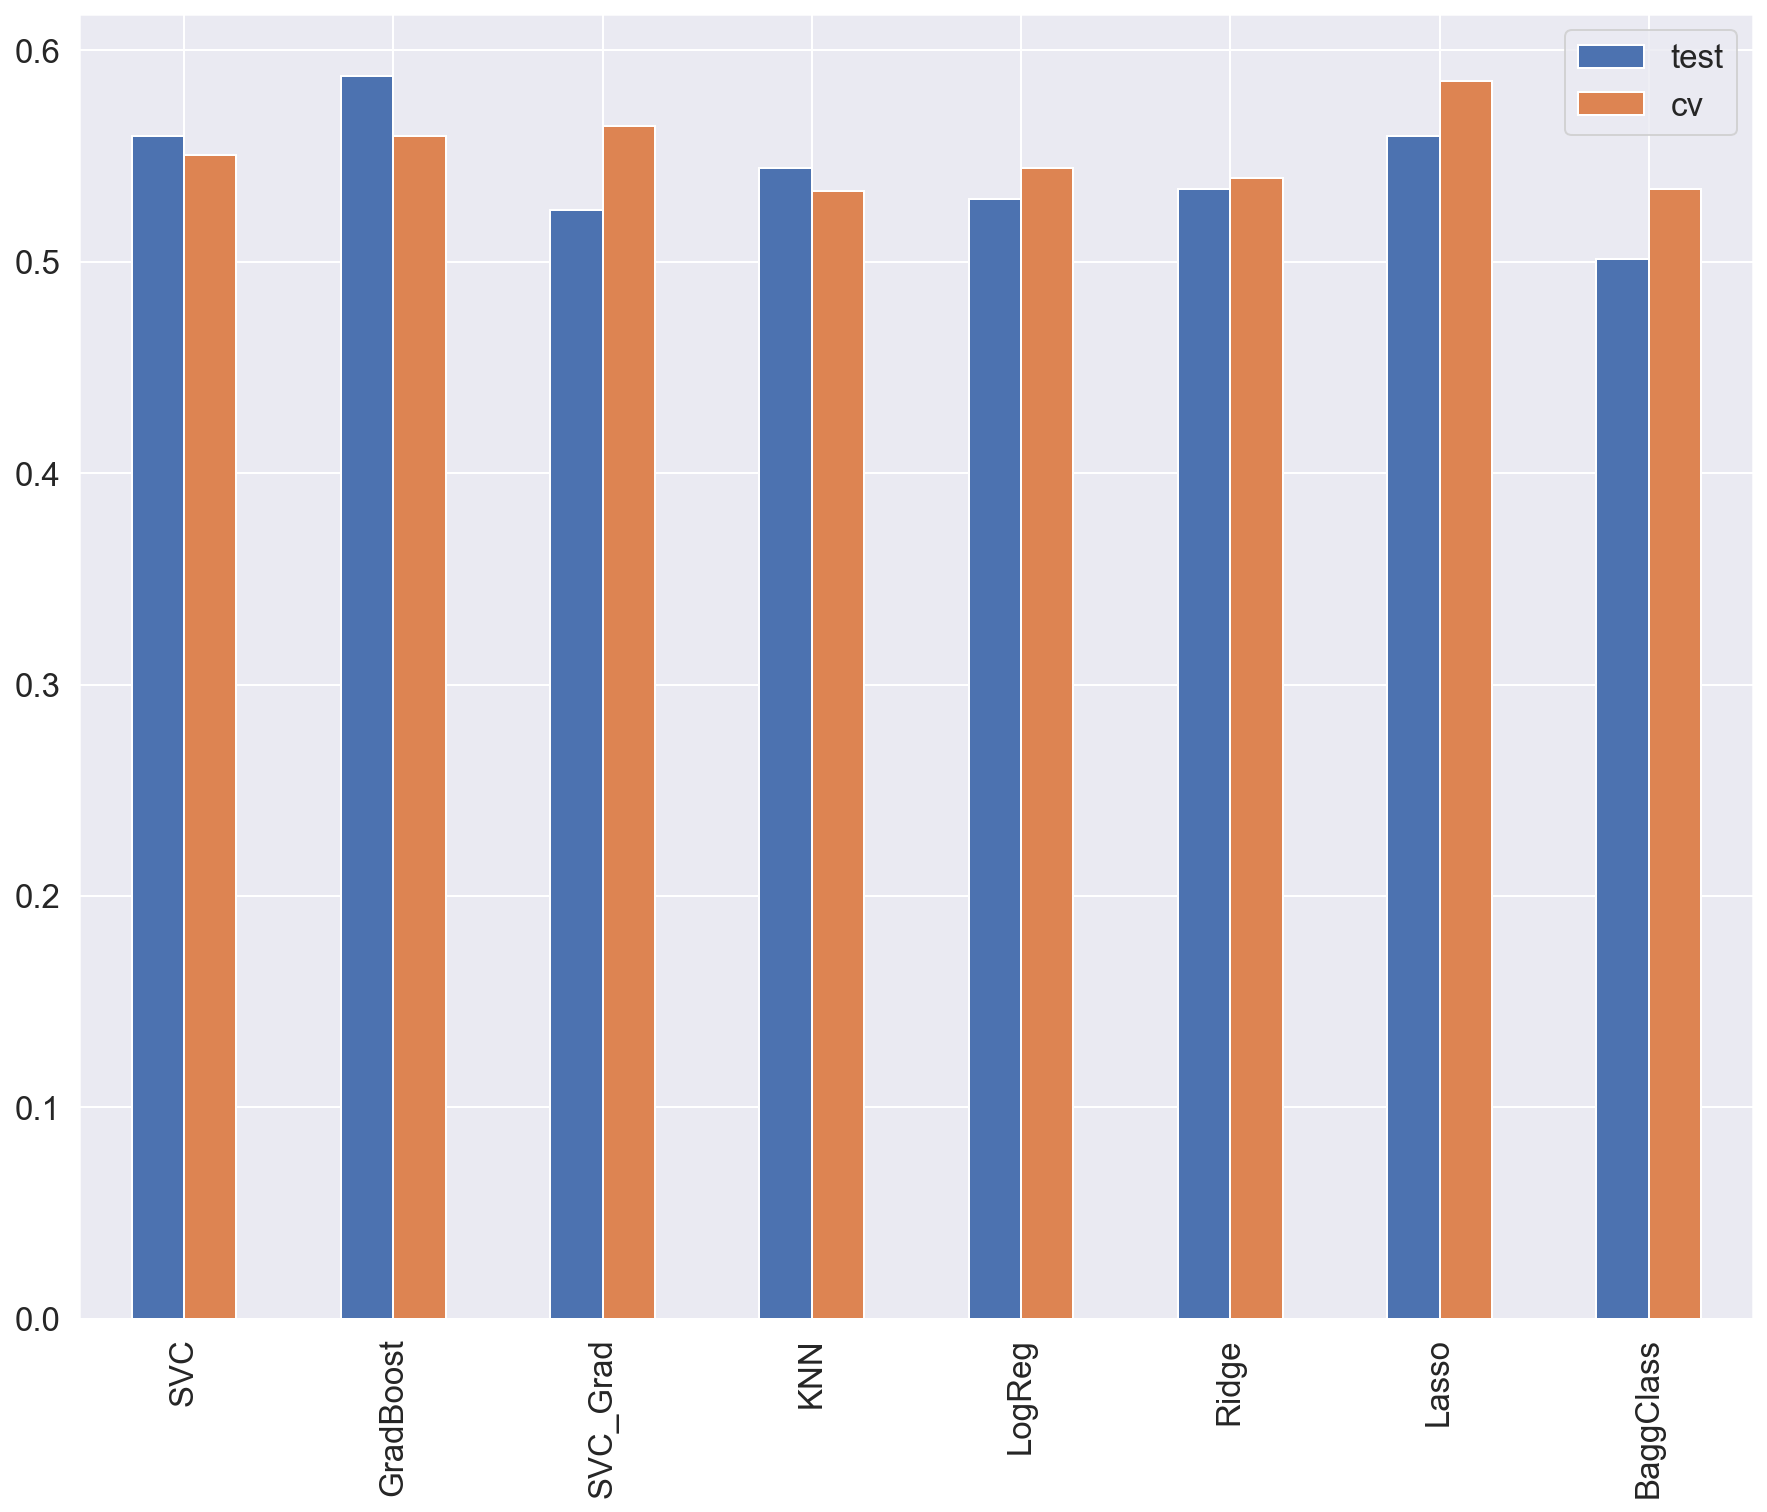

In [142]:
from matplotlib import pyplot as plt
models_df.drop(columns=['money_maker']).plot(kind='bar', figsize=[15,12])
plt.savefig('model.png', bbox_inches='tight')

In [138]:
models_df.sort_values(by='money_maker', ascending=False)

,money_maker,test,cv
SVC,0.477228,0.559406,0.550694
GradBoost,0.446535,0.587871,0.559406
SVC_Grad,0.430693,0.524699,0.564356
KNN,0.415842,0.544554,0.533425
LogReg,0.413861,0.529703,0.544554
Ridge,0.413861,0.534653,0.539604
Lasso,0.413861,0.559406,0.585396
BaggClass,0.405941,0.501227,0.534653


In [139]:
clf_test

0.5594059405940595

In [140]:
orig_df.to_csv('csv/with_probs.csv')

# Betting Comparison

In [97]:
foot_odds = pd.read_csv('football_all.csv')

In [98]:
only_odds = foot_odds.drop(columns=['Div','FTHG', 'FTAG', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5',
       'BbAv<2.5', 'Bb1X2', 'BbOU', 'BbAH', 'BbAHh', 'BbAH', 'BbMxAHH', 
       'BbAvAHH', 'BbMxAHA', 'BbAvAHA', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD',
       'BbMxA', 'BbAvA'])

In [99]:
only_odds.head()

,date,Date,HomeTeam,AwayTeam,FTR,B365H,B365D,B365A,BWH,BWD,...,PSA,WHH,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA
0,2016-08-13,13/08/2016,Burnley,Swansea,A,2.40,3.3,3.25,2.45,3.1,...,3.19,2.50,3.20,2.90,2.50,3.2,3.25,2.79,3.16,2.89
1,2016-08-13,13/08/2016,Crystal Palace,West Brom,A,2.00,3.3,4.50,2.00,3.2,...,4.32,2.05,3.10,4.00,2.00,3.3,4.40,2.25,3.15,3.86
2,2016-08-13,13/08/2016,Everton,Tottenham,D,3.20,3.4,2.40,2.95,3.2,...,2.37,3.10,3.10,2.40,3.25,3.4,2.38,3.64,3.54,2.16
3,2016-08-13,13/08/2016,Hull,Leicester,H,4.50,3.6,1.91,4.33,3.4,...,1.95,4.20,3.25,1.95,4.40,3.5,1.95,4.68,3.50,1.92
4,2016-08-13,13/08/2016,Man City,Sunderland,H,1.25,6.5,15.00,1.22,6.0,...,13.15,1.25,5.50,13.00,1.25,6.5,15.00,1.25,6.50,14.50


In [100]:
only_odds.shape

(1140, 26)

In [101]:
only_odds.columns

Index(['date', 'Date', 'HomeTeam', 'AwayTeam', 'FTR', 'B365H', 'B365D',
       'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA',
       'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'PSCH', 'PSCD', 'PSCA'],
      dtype='object')

In [102]:
# convert from decimal to probabilities

here_we_go = ['B365H', 'B365D', 'B365A', 'BWH',
       'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD',
       'WHA', 'VCH', 'VCD', 'VCA', 'PSCH', 'PSCD', 'PSCA']

for header in here_we_go:
    only_odds[header] = [1/i for i in only_odds[header]]

In [103]:
only_odds.head()

,date,Date,HomeTeam,AwayTeam,FTR,B365H,B365D,B365A,BWH,BWD,...,PSA,WHH,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA
0,2016-08-13,13/08/2016,Burnley,Swansea,A,0.416667,0.303030,0.307692,0.408163,0.322581,...,0.313480,0.400000,0.312500,0.344828,0.400000,0.312500,0.307692,0.358423,0.316456,0.346021
1,2016-08-13,13/08/2016,Crystal Palace,West Brom,A,0.500000,0.303030,0.222222,0.500000,0.312500,...,0.231481,0.487805,0.322581,0.250000,0.500000,0.303030,0.227273,0.444444,0.317460,0.259067
2,2016-08-13,13/08/2016,Everton,Tottenham,D,0.312500,0.294118,0.416667,0.338983,0.312500,...,0.421941,0.322581,0.322581,0.416667,0.307692,0.294118,0.420168,0.274725,0.282486,0.462963
3,2016-08-13,13/08/2016,Hull,Leicester,H,0.222222,0.277778,0.523560,0.230947,0.294118,...,0.512821,0.238095,0.307692,0.512821,0.227273,0.285714,0.512821,0.213675,0.285714,0.520833
4,2016-08-13,13/08/2016,Man City,Sunderland,H,0.800000,0.153846,0.066667,0.819672,0.166667,...,0.076046,0.800000,0.181818,0.076923,0.800000,0.153846,0.066667,0.800000,0.153846,0.068966


In [104]:
only_odds['FTR'] = [0 if i=='H' else 1 if i=='A' else 2 for i in only_odds['FTR']]

In [105]:
only_odds.tail()

,date,Date,HomeTeam,AwayTeam,FTR,B365H,B365D,B365A,BWH,BWD,...,PSA,WHH,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA
1135,2019-05-12,12/05/2019,Liverpool,Wolves,0,0.769231,0.166667,0.090909,0.769231,0.173913,...,0.094877,0.775194,0.181818,0.090909,0.769231,0.173913,0.086957,0.757576,0.169779,0.105485
1136,2019-05-12,12/05/2019,Man United,Cardiff,1,0.781250,0.153846,0.090909,0.800000,0.160000,...,0.097943,0.800000,0.153846,0.100000,0.775194,0.160000,0.090909,0.769231,0.165017,0.102987
1137,2019-05-12,12/05/2019,Southampton,Huddersfield,2,0.694444,0.210526,0.117647,0.704225,0.210526,...,0.131234,0.714286,0.210526,0.125000,0.714286,0.208333,0.117647,0.729927,0.186567,0.117786
1138,2019-05-12,12/05/2019,Tottenham,Everton,2,0.454545,0.285714,0.285714,0.476190,0.285714,...,0.274725,0.476190,0.285714,0.285714,0.476190,0.285714,0.270270,0.523560,0.262467,0.240964
1139,2019-05-12,12/05/2019,Watford,West Ham,1,0.444444,0.266667,0.312500,0.454545,0.270270,...,0.311526,0.454545,0.270270,0.322581,0.454545,0.266667,0.307692,0.473934,0.259067,0.293255


In [106]:
only_odds.drop(columns=['Date'], inplace=True)

In [107]:
only_odds['HomeTeam'] = ['ManUtd' if i=='Man United' else i for i in only_odds['HomeTeam']]
only_odds['HomeTeam'] = ['ManCity' if i=='Man City' else i for i in only_odds['HomeTeam']]
only_odds['HomeTeam'] = ['WestHam' if i=='West Ham' else i for i in only_odds['HomeTeam']]
only_odds['HomeTeam'] = ['WestBrom' if i=='West Brom' else i for i in only_odds['HomeTeam']]
only_odds['HomeTeam'] = ['HullCity' if i=='Hull' else i for i in only_odds['HomeTeam']]

In [108]:
only_odds.set_index('date', inplace=True, drop=True)

In [109]:
only_odds['key'] = [str(i)+n[:5] for i,n in zip(only_odds.index, only_odds['HomeTeam'])]

In [171]:
with_probs = pd.read_csv('with_probs.csv', index_col=0)

In [172]:
with_probs.columns

Index(['date', 'team1', 'team2', 'xg1', 'xg2', 'FTR', 'HTR', 'half_time_gd',
       'yellow_cards', 'total_shots', 'shots_on_target', 'free_kicks',
       'corners', 'red_cards', 'A Marriner', 'A Taylor', 'C Kavanagh',
       'C Pawson', 'D Coote', 'G Scott', 'J Moss', 'K Friend', 'L Mason',
       'L Probert', 'M Atkinson', 'M Clattenburg', 'M Dean', 'M Jones',
       'M Oliver', 'N Swarbrick', 'P Tierney', 'R East', 'R Madley',
       'S Attwell', 'S Hooper', 'l Mason', 'season_period', 'home_elo',
       'away_elo', 'score1', 'score2', 'FTR_alpha', 'xg1_5g_avg', 'xg2_5g_avg',
       'gd_5g_avg', 'game1', 'game2', 'game3', 'game4', 'game5', 'HomeWin',
       'AwayWin', 'Draw'],
      dtype='object')

In [173]:
only_probs = with_probs[['date', 'team1', 'team2','HomeWin', 'Draw', 'AwayWin', 'FTR']]

In [174]:
only_probs.head(10)

,date,team1,team2,HomeWin,Draw,AwayWin,FTR
0,2016-10-22,Burnley,Everton,0.451,0.181,0.367,0
1,2016-11-05,Burnley,Crystal Palace,0.741,0.126,0.133,0
2,2016-11-26,Burnley,ManCity,0.760,0.177,0.063,1
3,2016-12-10,Burnley,Bournemouth,0.754,0.103,0.142,0
4,2016-12-26,Burnley,Middlesbrough,0.693,0.168,0.139,0
5,2016-12-31,Burnley,Sunderland,0.445,0.124,0.431,0
6,2017-01-14,Burnley,Southampton,0.701,0.146,0.153,0
7,2017-01-31,Burnley,Leicester City,0.442,0.077,0.480,0
8,2017-02-12,Burnley,Chelsea,0.573,0.315,0.112,2
9,2017-04-01,Burnley,Tottenham Hotspur,0.301,0.220,0.479,1


In [175]:
only_probs.set_index('date', inplace=True, drop=True)

In [176]:
only_probs['key'] = [str(i)+n[:5] for i,n in zip(only_probs.index, only_probs['team1'])]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [177]:
only_probs.head()

,team1,team2,HomeWin,Draw,AwayWin,FTR,key
date,,,,,,,
2016-10-22,Burnley,Everton,0.451,0.181,0.367,0,2016-10-22Burnl
2016-11-05,Burnley,Crystal Palace,0.741,0.126,0.133,0,2016-11-05Burnl
2016-11-26,Burnley,ManCity,0.760,0.177,0.063,1,2016-11-26Burnl
2016-12-10,Burnley,Bournemouth,0.754,0.103,0.142,0,2016-12-10Burnl
2016-12-26,Burnley,Middlesbrough,0.693,0.168,0.139,0,2016-12-26Burnl


In [178]:
only_odds.head()

,HomeTeam,AwayTeam,FTR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA,key
date,,,,,,,,,,,,,,,,,,,,,,,,,
2016-08-13,Burnley,Swansea,1,0.416667,0.303030,0.307692,0.408163,0.322581,0.338983,0.400000,0.303030,0.377358,0.404858,0.301205,0.313480,0.400000,0.312500,0.344828,0.400000,0.312500,0.307692,0.358423,0.316456,0.346021,2016-08-13Burnl
2016-08-13,Crystal Palace,West Brom,1,0.500000,0.303030,0.222222,0.500000,0.312500,0.256410,0.476190,0.303030,0.303030,0.485437,0.303951,0.231481,0.487805,0.322581,0.250000,0.500000,0.303030,0.227273,0.444444,0.317460,0.259067,2016-08-13Cryst
2016-08-13,Everton,Tottenham,2,0.312500,0.294118,0.416667,0.338983,0.312500,0.416667,0.377358,0.303030,0.400000,0.307692,0.291545,0.421941,0.322581,0.322581,0.416667,0.307692,0.294118,0.420168,0.274725,0.282486,0.462963,2016-08-13Evert
2016-08-13,HullCity,Leicester,0,0.222222,0.277778,0.523560,0.230947,0.294118,0.526316,0.303030,0.303030,0.476190,0.225734,0.281690,0.512821,0.238095,0.307692,0.512821,0.227273,0.285714,0.512821,0.213675,0.285714,0.520833,2016-08-13HullC
2016-08-13,ManCity,Sunderland,0,0.800000,0.153846,0.066667,0.819672,0.166667,0.086957,0.800000,0.181818,0.097087,0.787402,0.154321,0.076046,0.800000,0.181818,0.076923,0.800000,0.153846,0.066667,0.800000,0.153846,0.068966,2016-08-13ManCi


In [179]:
only_odds.sort_values('key', inplace=True)

In [180]:
only_probs.sort_values('key', inplace=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [181]:
only_odds.head()

,HomeTeam,AwayTeam,FTR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA,key
date,,,,,,,,,,,,,,,,,,,,,,,,,
2016-08-13,Burnley,Swansea,1,0.416667,0.303030,0.307692,0.408163,0.322581,0.338983,0.400000,0.303030,0.377358,0.404858,0.301205,0.313480,0.400000,0.312500,0.344828,0.400000,0.312500,0.307692,0.358423,0.316456,0.346021,2016-08-13Burnl
2016-08-13,Crystal Palace,West Brom,1,0.500000,0.303030,0.222222,0.500000,0.312500,0.256410,0.476190,0.303030,0.303030,0.485437,0.303951,0.231481,0.487805,0.322581,0.250000,0.500000,0.303030,0.227273,0.444444,0.317460,0.259067,2016-08-13Cryst
2016-08-13,Everton,Tottenham,2,0.312500,0.294118,0.416667,0.338983,0.312500,0.416667,0.377358,0.303030,0.400000,0.307692,0.291545,0.421941,0.322581,0.322581,0.416667,0.307692,0.294118,0.420168,0.274725,0.282486,0.462963,2016-08-13Evert
2016-08-13,HullCity,Leicester,0,0.222222,0.277778,0.523560,0.230947,0.294118,0.526316,0.303030,0.303030,0.476190,0.225734,0.281690,0.512821,0.238095,0.307692,0.512821,0.227273,0.285714,0.512821,0.213675,0.285714,0.520833,2016-08-13HullC
2016-08-13,ManCity,Sunderland,0,0.800000,0.153846,0.066667,0.819672,0.166667,0.086957,0.800000,0.181818,0.097087,0.787402,0.154321,0.076046,0.800000,0.181818,0.076923,0.800000,0.153846,0.066667,0.800000,0.153846,0.068966,2016-08-13ManCi


In [182]:
only_probs.head()

,team1,team2,HomeWin,Draw,AwayWin,FTR,key
date,,,,,,,
2016-10-22,Burnley,Everton,0.451,0.181,0.367,0,2016-10-22Burnl
2016-11-05,Bournemouth,Sunderland,0.219,0.204,0.576,1,2016-11-05Bourn
2016-11-05,Burnley,Crystal Palace,0.741,0.126,0.133,0,2016-11-05Burnl
2016-11-05,Chelsea,Everton,0.416,0.154,0.430,0,2016-11-05Chels
2016-11-05,ManCity,Middlesbrough,0.730,0.162,0.108,2,2016-11-05ManCi


In [183]:
only_odds.shape, only_probs.shape

((1140, 25), (1010, 7))

In [184]:
odds_probs = pd.merge(left=only_probs, right=only_odds, left_on='key', right_on='key', how='left')

In [185]:
odds_probs.head()

,team1,team2,HomeWin,Draw,AwayWin,FTR_x,key,HomeTeam,AwayTeam,FTR_y,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA
0,Burnley,Everton,0.451,0.181,0.367,0,2016-10-22Burnl,Burnley,Everton,0,0.166667,0.263158,0.598802,0.166667,0.263158,0.617284,0.208333,0.277778,0.571429,0.165289,0.258398,0.595238,0.166667,0.277778,0.598802,0.160000,0.263158,0.598802,0.169492,0.268097,0.584795
1,Bournemouth,Sunderland,0.219,0.204,0.576,1,2016-11-05Bourn,Bournemouth,Sunderland,1,0.606061,0.238095,0.181818,0.617284,0.256410,0.173913,0.606061,0.263158,0.188679,0.613497,0.234192,0.173010,0.598802,0.277778,0.166667,0.606061,0.250000,0.173913,0.613497,0.227273,0.178253
2,Burnley,Crystal Palace,0.741,0.126,0.133,0,2016-11-05Burnl,Burnley,Crystal Palace,0,0.303030,0.303030,0.420168,0.312500,0.307692,0.425532,0.338983,0.303030,0.416667,0.292398,0.296736,0.431034,0.303030,0.322581,0.416667,0.285714,0.303030,0.434783,0.277778,0.305810,0.436681
3,Chelsea,Everton,0.416,0.154,0.430,0,2016-11-05Chels,Chelsea,Everton,0,0.653595,0.230947,0.142857,0.653595,0.238095,0.160000,0.645161,0.250000,0.161290,0.636943,0.228833,0.154560,0.636943,0.266667,0.142857,0.636943,0.230947,0.153846,0.666667,0.216920,0.135135
4,ManCity,Middlesbrough,0.730,0.162,0.108,2,2016-11-05ManCi,ManCity,Middlesbrough,2,0.819672,0.142857,0.066667,0.833333,0.148148,0.068966,0.833333,0.153846,0.066667,0.813008,0.139665,0.070323,0.819672,0.153846,0.076923,0.819672,0.142857,0.066667,0.819672,0.132450,0.067797


In [186]:
odds_probs.columns

Index(['team1', 'team2', 'HomeWin', 'Draw', 'AwayWin', 'FTR_x', 'key',
       'HomeTeam', 'AwayTeam', 'FTR_y', 'B365H', 'B365D', 'B365A', 'BWH',
       'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD',
       'WHA', 'VCH', 'VCD', 'VCA', 'PSCH', 'PSCD', 'PSCA'],
      dtype='object')

In [187]:
odds_probs['FTR'] = odds_probs['FTR_x']

In [188]:
odds_probs.drop(columns=['key', 'HomeTeam', 'AwayTeam', 'FTR_y', 'FTR_x'], inplace=True)

In [189]:
odds_probs.head()

,team1,team2,HomeWin,Draw,AwayWin,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA,FTR
0,Burnley,Everton,0.451,0.181,0.367,0.166667,0.263158,0.598802,0.166667,0.263158,0.617284,0.208333,0.277778,0.571429,0.165289,0.258398,0.595238,0.166667,0.277778,0.598802,0.160000,0.263158,0.598802,0.169492,0.268097,0.584795,0
1,Bournemouth,Sunderland,0.219,0.204,0.576,0.606061,0.238095,0.181818,0.617284,0.256410,0.173913,0.606061,0.263158,0.188679,0.613497,0.234192,0.173010,0.598802,0.277778,0.166667,0.606061,0.250000,0.173913,0.613497,0.227273,0.178253,1
2,Burnley,Crystal Palace,0.741,0.126,0.133,0.303030,0.303030,0.420168,0.312500,0.307692,0.425532,0.338983,0.303030,0.416667,0.292398,0.296736,0.431034,0.303030,0.322581,0.416667,0.285714,0.303030,0.434783,0.277778,0.305810,0.436681,0
3,Chelsea,Everton,0.416,0.154,0.430,0.653595,0.230947,0.142857,0.653595,0.238095,0.160000,0.645161,0.250000,0.161290,0.636943,0.228833,0.154560,0.636943,0.266667,0.142857,0.636943,0.230947,0.153846,0.666667,0.216920,0.135135,0
4,ManCity,Middlesbrough,0.730,0.162,0.108,0.819672,0.142857,0.066667,0.833333,0.148148,0.068966,0.833333,0.153846,0.066667,0.813008,0.139665,0.070323,0.819672,0.153846,0.076923,0.819672,0.142857,0.066667,0.819672,0.132450,0.067797,2


In [190]:
odds_probs.to_csv('odds_probs_clean.csv')

In [214]:
odds_probs = pd.read_csv('odds_probs_clean.csv', index_col=0)

In [215]:
cols = odds_probs.columns[2:-1]

In [216]:
cols

Index(['HomeWin', 'Draw', 'AwayWin', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD',
       'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA',
       'VCH', 'VCD', 'VCA', 'PSCH', 'PSCD', 'PSCA'],
      dtype='object')

In [217]:
df_odds_probs_clean = odds_probs.copy()

In [218]:
df_odds_probs_clean.columns

Index(['team1', 'team2', 'HomeWin', 'Draw', 'AwayWin', 'B365H', 'B365D',
       'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA',
       'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'PSCH', 'PSCD', 'PSCA',
       'FTR'],
      dtype='object')

In [219]:
df_odds_probs_clean = df_odds_probs_clean[['team1', 'team2', 'HomeWin', 'Draw', 'AwayWin', 'FTR', 'B365H', 'B365D',
       'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA',
       'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'PSCH', 'PSCD', 'PSCA']]

In [225]:
df_odds_probs_clean.tail(10)

,team1,team2,HomeWin,Draw,AwayWin,FTR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA
1000,Brighton and Hove Albion,ManCity,0.497,0.287,0.217,A,0.052632,0.117647,0.862069,0.057143,0.114286,0.877193,0.058824,0.125000,0.869565,0.063980,0.122399,0.847458,0.052632,0.125000,0.877193,0.047619,0.117647,0.869565,0.075930,0.138122,0.819672
1001,Burnley,Arsenal,0.390,0.200,0.410,A,0.307692,0.263158,0.454545,0.322581,0.266667,0.465116,0.322581,0.266667,0.465116,0.317460,0.263158,0.444444,0.322581,0.270270,0.454545,0.319489,0.263158,0.454545,0.396825,0.271003,0.357143
1002,Crystal Palace,Bournemouth,0.330,0.240,0.430,H,0.526316,0.238095,0.263158,0.540541,0.256410,0.256410,0.540541,0.253165,0.259740,0.531915,0.241546,0.253165,0.546448,0.250000,0.256410,0.540541,0.243902,0.243902,0.558659,0.227273,0.240385
1003,Fulham,Newcastle,0.303,0.129,0.568,A,0.400000,0.277778,0.344828,0.392157,0.277778,0.377358,0.400000,0.285714,0.363636,0.392157,0.280112,0.353357,0.400000,0.285714,0.363636,0.400000,0.285714,0.347222,0.401606,0.281690,0.341297
1004,Leicester City,Chelsea,0.766,0.186,0.049,D,0.416667,0.266667,0.344828,0.425532,0.277778,0.350877,0.425532,0.285714,0.344828,0.409836,0.273973,0.341297,0.420168,0.277778,0.347222,0.416667,0.270270,0.344828,0.413223,0.275482,0.335570
1005,Liverpool,Wolverhampton,0.315,0.195,0.490,H,0.769231,0.166667,0.090909,0.769231,0.173913,0.105263,0.763359,0.185185,0.107527,0.763359,0.173310,0.094877,0.775194,0.181818,0.090909,0.769231,0.173913,0.086957,0.757576,0.169779,0.105485
1006,ManUtd,Cardiff City,0.710,0.180,0.110,A,0.781250,0.153846,0.090909,0.800000,0.160000,0.090909,0.781250,0.163934,0.108696,0.781250,0.157978,0.097943,0.800000,0.153846,0.100000,0.775194,0.160000,0.090909,0.769231,0.165017,0.102987
1007,Southampton,Huddersfield Town,0.628,0.237,0.135,D,0.694444,0.210526,0.117647,0.704225,0.210526,0.137931,0.704225,0.208333,0.140845,0.694444,0.207039,0.131234,0.714286,0.210526,0.125000,0.714286,0.208333,0.117647,0.729927,0.186567,0.117786
1008,Tottenham Hotspur,Everton,0.789,0.148,0.062,D,0.454545,0.285714,0.285714,0.476190,0.285714,0.285714,0.487805,0.289855,0.277778,0.476190,0.274725,0.274725,0.476190,0.285714,0.285714,0.476190,0.285714,0.270270,0.523560,0.262467,0.240964
1009,Watford,WestHam,0.617,0.257,0.125,A,0.444444,0.266667,0.312500,0.454545,0.270270,0.322581,0.454545,0.266667,0.327869,0.454545,0.259740,0.311526,0.454545,0.270270,0.322581,0.454545,0.266667,0.307692,0.473934,0.259067,0.293255


In [222]:
df_odds_probs_clean['FTR'] = ['H' if i==0 else 'D' if i==2 else 'A' for i in df_odds_probs_clean['FTR']]

In [223]:
[i for i in df_odds_probs_clean['FTR']]

['H',
 'A',
 'H',
 'H',
 'D',
 'D',
 'D',
 'H',
 'A',
 'A',
 'A',
 'D',
 'D',
 'D',
 'A',
 'H',
 'H',
 'H',
 'A',
 'H',
 'A',
 'H',
 'D',
 'D',
 'H',
 'H',
 'H',
 'D',
 'H',
 'A',
 'H',
 'A',
 'H',
 'H',
 'H',
 'H',
 'A',
 'H',
 'D',
 'H',
 'H',
 'H',
 'D',
 'H',
 'H',
 'H',
 'H',
 'D',
 'H',
 'H',
 'H',
 'H',
 'A',
 'H',
 'A',
 'D',
 'A',
 'H',
 'H',
 'H',
 'A',
 'H',
 'D',
 'H',
 'A',
 'H',
 'A',
 'H',
 'H',
 'A',
 'H',
 'H',
 'H',
 'A',
 'A',
 'H',
 'A',
 'D',
 'H',
 'A',
 'D',
 'H',
 'H',
 'H',
 'H',
 'H',
 'A',
 'A',
 'H',
 'A',
 'H',
 'H',
 'D',
 'D',
 'H',
 'A',
 'D',
 'A',
 'H',
 'H',
 'H',
 'H',
 'A',
 'A',
 'A',
 'H',
 'D',
 'H',
 'H',
 'D',
 'D',
 'A',
 'A',
 'D',
 'A',
 'D',
 'H',
 'H',
 'H',
 'H',
 'A',
 'A',
 'H',
 'D',
 'D',
 'D',
 'H',
 'D',
 'D',
 'A',
 'H',
 'A',
 'H',
 'H',
 'A',
 'H',
 'H',
 'H',
 'A',
 'H',
 'H',
 'H',
 'H',
 'D',
 'H',
 'A',
 'D',
 'D',
 'H',
 'A',
 'H',
 'H',
 'H',
 'D',
 'D',
 'H',
 'H',
 'H',
 'H',
 'H',
 'D',
 'H',
 'H',
 'A',
 'A',
 'A',
 'H'

In [212]:
df_odds_probs_clean.head(10)

,team1,team2,HomeWin,Draw,AwayWin,FTR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA,HomeWi_best,HomeWi_pred,B365_best,B365_pred,BW_best,BW_pred,IW_best,IW_pred,PS_best,PS_pred,WH_best,WH_pred,VC_best,VC_pred,PSC_best,PSC_pred
0,Burnley,Everton,0.451,0.181,0.367,A,0.166667,0.263158,0.598802,0.166667,0.263158,0.617284,0.208333,0.277778,0.571429,0.165289,0.258398,0.595238,0.166667,0.277778,0.598802,0.160000,0.263158,0.598802,0.169492,0.268097,0.584795,0.451,1,0.598802,0,0.617284,0,0.571429,0,0.595238,0,0.598802,0,0.598802,0,0.584795,0
1,Bournemouth,Sunderland,0.219,0.204,0.576,A,0.606061,0.238095,0.181818,0.617284,0.256410,0.173913,0.606061,0.263158,0.188679,0.613497,0.234192,0.173010,0.598802,0.277778,0.166667,0.606061,0.250000,0.173913,0.613497,0.227273,0.178253,0.576,1,0.606061,0,0.617284,0,0.606061,0,0.613497,0,0.598802,0,0.606061,0,0.613497,0
2,Burnley,Crystal Palace,0.741,0.126,0.133,A,0.303030,0.303030,0.420168,0.312500,0.307692,0.425532,0.338983,0.303030,0.416667,0.292398,0.296736,0.431034,0.303030,0.322581,0.416667,0.285714,0.303030,0.434783,0.277778,0.305810,0.436681,0.741,1,0.420168,0,0.425532,0,0.416667,0,0.431034,0,0.416667,0,0.434783,0,0.436681,0
3,Chelsea,Everton,0.416,0.154,0.430,A,0.653595,0.230947,0.142857,0.653595,0.238095,0.160000,0.645161,0.250000,0.161290,0.636943,0.228833,0.154560,0.636943,0.266667,0.142857,0.636943,0.230947,0.153846,0.666667,0.216920,0.135135,0.430,0,0.653595,1,0.653595,1,0.645161,1,0.636943,1,0.636943,1,0.636943,1,0.666667,1
4,ManCity,Middlesbrough,0.730,0.162,0.108,A,0.819672,0.142857,0.066667,0.833333,0.148148,0.068966,0.833333,0.153846,0.066667,0.813008,0.139665,0.070323,0.819672,0.153846,0.076923,0.819672,0.142857,0.066667,0.819672,0.132450,0.067797,0.730,0,0.819672,0,0.833333,0,0.833333,0,0.813008,0,0.819672,0,0.819672,0,0.819672,0
5,WestHam,Stoke City,0.325,0.120,0.555,A,0.500000,0.277778,0.250000,0.500000,0.285714,0.263158,0.500000,0.294118,0.263158,0.500000,0.278552,0.242131,0.487805,0.303030,0.250000,0.487805,0.277778,0.256410,0.497512,0.283286,0.239808,0.555,0,0.500000,0,0.500000,0,0.500000,0,0.500000,0,0.487805,0,0.487805,0,0.497512,0
6,Arsenal,Tottenham Hotspur,0.736,0.209,0.055,A,0.512821,0.277778,0.238095,0.512821,0.277778,0.256410,0.500000,0.294118,0.263158,0.512821,0.278552,0.229885,0.500000,0.312500,0.230947,0.512821,0.285714,0.238095,0.507614,0.275482,0.238095,0.736,0,0.512821,0,0.512821,0,0.500000,0,0.512821,0,0.500000,0,0.512821,0,0.507614,0
7,HullCity,Southampton,0.802,0.124,0.074,A,0.173913,0.263158,0.588235,0.181818,0.263158,0.606061,0.188679,0.263158,0.606061,0.174520,0.257732,0.588235,0.181818,0.277778,0.588235,0.173913,0.266667,0.588235,0.173913,0.256410,0.591716,0.802,1,0.588235,0,0.606061,0,0.606061,0,0.588235,0,0.588235,0,0.588235,0,0.591716,0
8,Leicester City,WestBrom,0.390,0.150,0.460,A,0.555556,0.277778,0.190476,0.561798,0.277778,0.210526,0.571429,0.277778,0.208333,0.561798,0.275482,0.182149,0.555556,0.303030,0.181818,0.555556,0.277778,0.192308,0.574713,0.268817,0.176991,0.460,1,0.555556,0,0.561798,0,0.571429,0,0.561798,0,0.555556,0,0.555556,0,0.574713,0
9,Swansea City,ManUtd,0.328,0.181,0.491,A,0.200000,0.250000,0.578035,0.210526,0.256410,0.581395,0.188679,0.263158,0.606061,0.202429,0.249377,0.568182,0.200000,0.266667,0.578035,0.200000,0.250000,0.578035,0.180832,0.247525,0.591716,0.491,1,0.578035,1,0.581395,1,0.606061,1,0.568182,1,0.578035,1,0.578035,1,0.591716,1


In [198]:
checkywecky = []
for i in range(len(df_odds_probs_clean)):
    checkywecky.append(np.argmax(df_odds_probs_clean[['B365H', 'B365D', 'B365A']].iloc[i]))

sum([1 if j==n else 0 for j,n in 
     zip([0 if i=='B365H' else 1 if i=='B365A' else 2 for i in checkywecky], 
         df_odds_probs_clean['FTR'])])/1010

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


0.5851485148514851

In [199]:
cols

Index(['HomeWin', 'Draw', 'AwayWin', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD',
       'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA',
       'VCH', 'VCD', 'VCA', 'PSCH', 'PSCD', 'PSCA'],
      dtype='object')

In [200]:
# Using BC Predictions

for col in range(0,24,3):
    checkywecky = []
    for i in range(len(df_odds_probs_clean)):
        checkywecky.append(np.argmax(df_odds_probs_clean[[cols[col], cols[col+1], cols[col+2]]].iloc[i]))
        
    print(sum([1 if j==n else 0 for j,n in 
     zip([0 if i==cols[col] else 1 if i==cols[col+2] else 2 for i in checkywecky], 
         df_odds_probs_clean['FTR'])])/1010)

0.4396039603960396
0.5851485148514851
0.5841584158415841
0.5881188118811881
0.5831683168316831
0.5861386138613861
0.5841584158415841
0.5811881188118811


In [201]:
for col in range(0,24,3):
    list_lists = []
    for index, row in odds_probs.iterrows():
        list_lists.append(list((row[cols[col]], row[cols[col+1]], row[cols[col+2]])))
    
    the_best = []
    positions = []
    
    for pos in list_lists:
        
        the_best.append(max(pos))
        
        if np.argmax(pos) == 0:
            positions.append(0)
            
        elif np.argmax(pos) == 1:
            positions.append(2)
            
        else:
            positions.append(1)
    
    print(set(positions))
    accurate_guesses = []
    for pred, actual in zip(df_odds_probs_clean['FTR'], positions):
        if pred == actual:
            accurate_guesses.append(1)
        else:
            accurate_guesses.append(0)

    df_odds_probs_clean[str(cols[col][:-1]) + '_best'] = the_best
    df_odds_probs_clean[str(cols[col][:-1]) + '_pred'] = accurate_guesses

{0, 1, 2}
{0, 1}
{0, 1}
{0, 1}
{0, 1}
{0, 1}
{0, 1}
{0, 1}


In [202]:
pd.options.display.max_columns = 100

In [203]:
svc_preds

,HomeWin,AwayWin,Draw
0,0.485320,0.274891,0.239789
1,0.485320,0.274891,0.239789
2,0.485241,0.275007,0.239752
3,0.485320,0.274891,0.239789
4,0.485320,0.274891,0.239789
5,0.484740,0.275485,0.239775
6,0.485320,0.274891,0.239789
7,0.485320,0.274891,0.239789
8,0.485320,0.274891,0.239789
9,0.485320,0.274891,0.239789


In [204]:
df_odds_probs_clean.head(10)

,team1,team2,HomeWin,Draw,AwayWin,FTR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA,HomeWi_best,HomeWi_pred,B365_best,B365_pred,BW_best,BW_pred,IW_best,IW_pred,PS_best,PS_pred,WH_best,WH_pred,VC_best,VC_pred,PSC_best,PSC_pred
0,Burnley,Everton,0.451,0.181,0.367,0,0.166667,0.263158,0.598802,0.166667,0.263158,0.617284,0.208333,0.277778,0.571429,0.165289,0.258398,0.595238,0.166667,0.277778,0.598802,0.160000,0.263158,0.598802,0.169492,0.268097,0.584795,0.451,1,0.598802,0,0.617284,0,0.571429,0,0.595238,0,0.598802,0,0.598802,0,0.584795,0
1,Bournemouth,Sunderland,0.219,0.204,0.576,1,0.606061,0.238095,0.181818,0.617284,0.256410,0.173913,0.606061,0.263158,0.188679,0.613497,0.234192,0.173010,0.598802,0.277778,0.166667,0.606061,0.250000,0.173913,0.613497,0.227273,0.178253,0.576,1,0.606061,0,0.617284,0,0.606061,0,0.613497,0,0.598802,0,0.606061,0,0.613497,0
2,Burnley,Crystal Palace,0.741,0.126,0.133,0,0.303030,0.303030,0.420168,0.312500,0.307692,0.425532,0.338983,0.303030,0.416667,0.292398,0.296736,0.431034,0.303030,0.322581,0.416667,0.285714,0.303030,0.434783,0.277778,0.305810,0.436681,0.741,1,0.420168,0,0.425532,0,0.416667,0,0.431034,0,0.416667,0,0.434783,0,0.436681,0
3,Chelsea,Everton,0.416,0.154,0.430,0,0.653595,0.230947,0.142857,0.653595,0.238095,0.160000,0.645161,0.250000,0.161290,0.636943,0.228833,0.154560,0.636943,0.266667,0.142857,0.636943,0.230947,0.153846,0.666667,0.216920,0.135135,0.430,0,0.653595,1,0.653595,1,0.645161,1,0.636943,1,0.636943,1,0.636943,1,0.666667,1
4,ManCity,Middlesbrough,0.730,0.162,0.108,2,0.819672,0.142857,0.066667,0.833333,0.148148,0.068966,0.833333,0.153846,0.066667,0.813008,0.139665,0.070323,0.819672,0.153846,0.076923,0.819672,0.142857,0.066667,0.819672,0.132450,0.067797,0.730,0,0.819672,0,0.833333,0,0.833333,0,0.813008,0,0.819672,0,0.819672,0,0.819672,0
5,WestHam,Stoke City,0.325,0.120,0.555,2,0.500000,0.277778,0.250000,0.500000,0.285714,0.263158,0.500000,0.294118,0.263158,0.500000,0.278552,0.242131,0.487805,0.303030,0.250000,0.487805,0.277778,0.256410,0.497512,0.283286,0.239808,0.555,0,0.500000,0,0.500000,0,0.500000,0,0.500000,0,0.487805,0,0.487805,0,0.497512,0
6,Arsenal,Tottenham Hotspur,0.736,0.209,0.055,2,0.512821,0.277778,0.238095,0.512821,0.277778,0.256410,0.500000,0.294118,0.263158,0.512821,0.278552,0.229885,0.500000,0.312500,0.230947,0.512821,0.285714,0.238095,0.507614,0.275482,0.238095,0.736,0,0.512821,0,0.512821,0,0.500000,0,0.512821,0,0.500000,0,0.512821,0,0.507614,0
7,HullCity,Southampton,0.802,0.124,0.074,0,0.173913,0.263158,0.588235,0.181818,0.263158,0.606061,0.188679,0.263158,0.606061,0.174520,0.257732,0.588235,0.181818,0.277778,0.588235,0.173913,0.266667,0.588235,0.173913,0.256410,0.591716,0.802,1,0.588235,0,0.606061,0,0.606061,0,0.588235,0,0.588235,0,0.588235,0,0.591716,0
8,Leicester City,WestBrom,0.390,0.150,0.460,1,0.555556,0.277778,0.190476,0.561798,0.277778,0.210526,0.571429,0.277778,0.208333,0.561798,0.275482,0.182149,0.555556,0.303030,0.181818,0.555556,0.277778,0.192308,0.574713,0.268817,0.176991,0.460,1,0.555556,0,0.561798,0,0.571429,0,0.561798,0,0.555556,0,0.555556,0,0.574713,0
9,Swansea City,ManUtd,0.328,0.181,0.491,1,0.200000,0.250000,0.578035,0.210526,0.256410,0.581395,0.188679,0.263158,0.606061,0.202429,0.249377,0.568182,0.200000,0.266667,0.578035,0.200000,0.250000,0.578035,0.180832,0.247525,0.591716,0.491,1,0.578035,1,0.581395,1,0.606061,1,0.568182,1,0.578035,1,0.578035,1,0.591716,1


In [205]:
# by printing set(positions) we can see that over the course of 3 seasons the bookies never favoured a draw...
# This could be interesting... may be where my model could make up some ground... if I am predicting 
# a win with equal probability to a draw, then I should favour the draw and see how that affects my score

In [206]:
df_odds_probs_clean.columns

Index(['team1', 'team2', 'HomeWin', 'Draw', 'AwayWin', 'FTR', 'B365H', 'B365D',
       'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA',
       'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'PSCH', 'PSCD', 'PSCA',
       'HomeWi_best', 'HomeWi_pred', 'B365_best', 'B365_pred', 'BW_best',
       'BW_pred', 'IW_best', 'IW_pred', 'PS_best', 'PS_pred', 'WH_best',
       'WH_pred', 'VC_best', 'VC_pred', 'PSC_best', 'PSC_pred'],
      dtype='object')

In [183]:
predders = [i for i in list(df_odds_probs_clean.columns) if i[-4:] == 'pred']

In [184]:
df_odds_probs_clean['HomeWi_pred'].sum()/1010

0.4801980198019802

In [185]:
df_odds_probs_clean['B365_pred'].sum()/1010

0.5851485148514851

In [186]:
0.4158415841584158+0.5851485148514851

1.000990099009901

In [187]:
for i in range(len(predders)):
    print(np.sum(df_odds_probs_clean[predders[i]])/1010)

0.4801980198019802
0.5851485148514851
0.5841584158415841
0.5881188118811881
0.5831683168316831
0.5861386138613861
0.5841584158415841
0.5811881188118811


In [191]:
# running a betting model. Place bets daily, and use results from the end of the day to add to your 
# purse. Then use new purse total to place further bets...
# Do this until purse is empty or season is over.

In [192]:
# find out the bookies margin by adding all three values per game together to get an amount higher than 100
# the difference will be the margin I need to outperform.... maybe

In [193]:
for i in range(0,len(combined.columns)-3,3):
    col = []
    clean = []
    for j in range(len(combined)):
        col.append(combined.iloc[:,i:i+3][j:j+1].sum(axis=1)-1)
    for x in range(len(col)):
        clean.append(col[x][0])
    combined[i] = clean
    
    
    
# Adds a column to the end of the dataframe showing the bookies margin per Home/Away/Draw bet

NameError: name 'combined' is not defined